In [28]:
import ipynb
from ipynb.fs.full.joinFeatures import mergedData
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from bokeh.io import curdoc
from bokeh.layouts import column, row 
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import ColumnDataSource, DataRange1d, Select, Blues4, HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html
import os
#print(os.listdir("./"))
output_notebook()

plt.rc("figure", figsize=(12,8))
plt.rc("font", size=10)

TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'

Loading BokehJS ...

In [29]:
iowa1 = mergedData()

model_allStates_pmdi1.csv
model_allStates_minTemp1.csv
model_allStates_precip.csv
model_allStates_quality.csv
model_allStates_zndx1.csv
model_allStates_pdsi1.csv
model_allStates_podcount.csv
model_allStates_yields.csv
model_allStates_maxTemp1.csv


In [30]:
iowa1 = iowa1[iowa1["State"]=="IOWA"]
iowaOriginal = iowa1[iowa1["State"]=="IOWA"]

In [234]:
p = figure(title="Year Yields", y_axis_type="linear", plot_height = 500,
           tools = TOOLS, plot_width = 800)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Yields'
p.circle(2016, iowa1.Yield.max(), size = 10, color = 'red')

p.line(iowa1.Year, iowa1.Yield,line_color="blue", line_width = 2)
p.line(iowa1.Year, iowa1.Yield, legend_label="Yield", line_color="blue", line_width = 1)
p.legend.location = "top_left"

p.select_one(HoverTool).tooltips = [('year', '@x'),('yield', '@y'),]

output_file("line_chart.html", title="Line Chart")
show(p)

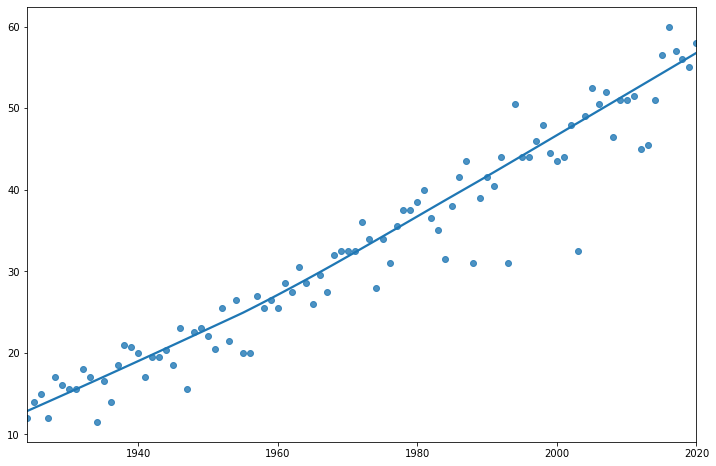

In [32]:
y = iowa1["Yield"].values
x = iowa1["Year"].values
sns.regplot(x, y, lowess=True)

In [33]:
modelAllYears = smf.ols(formula = 'Yield ~ Year + I(Year**2)  + I(Year**3)', data=iowa1).fit()
modelAllYears_linear = smf.ols(formula = 'Yield ~ Year', data=iowa1).fit()
print(modelAllYears_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1265.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.08e-56
Time:                        15:37:33   Log-Likelihood:                -257.98
No. Observations:                  97   AIC:                             520.0
Df Residuals:                      95   BIC:                             525.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -855.7392     24.988    -34.247      0.0

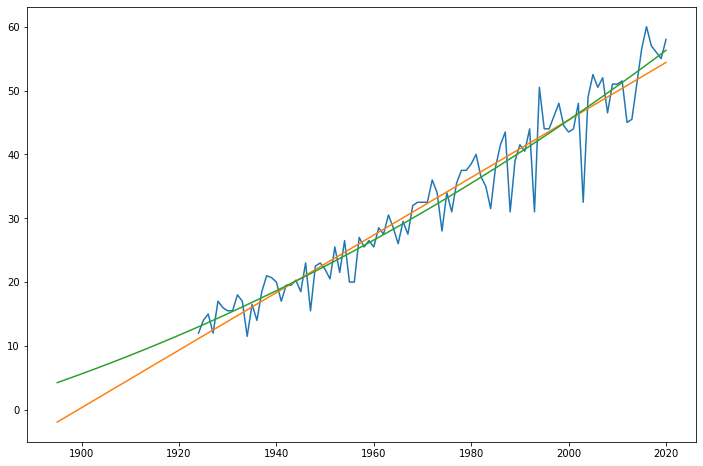

In [34]:
est1 = modelAllYears.params[0] + modelAllYears.params[1]*iowa1["Year"] + modelAllYears.params[2]*iowa1["Year"]*iowa1["Year"] + modelAllYears.params[3]*iowa1["Year"]*iowa1["Year"]*iowa1["Year"]
est1_linear = modelAllYears_linear.params[0] + modelAllYears_linear.params[1]*iowa1["Year"]
plt.plot(x, y)
plt.plot(x, est1_linear)
plt.plot(x, est1)
plt.savefig('yields.png')
plt.show()


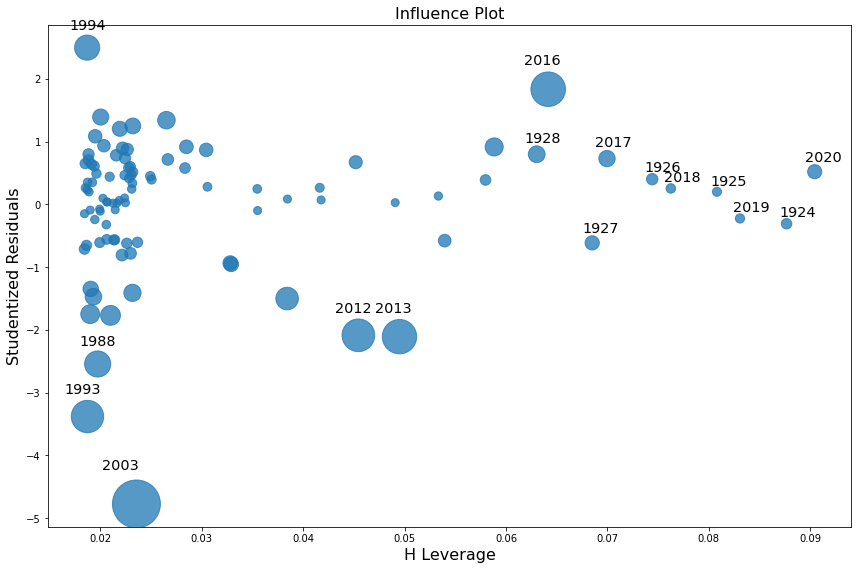

In [35]:
fig = sm.graphics.influence_plot(modelAllYears, criterion="cooks")
fig.tight_layout(pad=1.0)

In [36]:
iowaUntil1980 = iowa1[iowa1["Year"] <= 1981]
modelUntil1980 = smf.ols(formula = 'Yield ~ Year', data=iowaUntil1980).fit()
print(modelUntil1980.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     490.0
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.28e-29
Time:                        15:37:34   Log-Likelihood:                -133.25
No. Observations:                  58   AIC:                             270.5
Df Residuals:                      56   BIC:                             274.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -806.4965     37.521    -21.494      0.0

In [37]:
iowaAfter1980 = iowa1[iowa1["Year"] > 1981]
modelAfter1980 = smf.ols(formula = 'Yield ~ Year', data=iowaAfter1980).fit()
print(modelAfter1980.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     72.56
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           3.00e-10
Time:                        15:37:34   Log-Likelihood:                -113.34
No. Observations:                  39   AIC:                             230.7
Df Residuals:                      37   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.9703    129.346     -8.164      0.0

In [38]:
iowaAfter2010 = iowa1[iowa1["Year"] > 2010]
modelAfter2010 = smf.ols(formula = 'Yield ~ Year', data=iowaAfter2010).fit()
print(modelAfter2010.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     8.685
Date:                Sun, 20 Sep 2020   Prob (F-statistic):             0.0185
Time:                        15:37:34   Log-Likelihood:                -26.378
No. Observations:                  10   AIC:                             56.76
Df Residuals:                       8   BIC:                             57.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2420.0182    839.354     -2.883      0.0

In [39]:
iowa1["floodYear"] = 0.0
iowa1.loc[iowa1['Year'] == 1993, "floodYear"] = 1
# iowa2 = iowa1[['State', 'Year', 'Yield','floodYear', 'Pmdi1_May', 'Pmdi1_Jun', 'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct', 
#                'Mintemp_Jul', 'Mintemp_Aug', 'Mintemp_Sep','Mintemp_Oct', 'Precip_May','Precip_Jun', 'Precip_Jul', 'Precip_Aug', 'Precip_Sep', 
#                'Precip_Oct', 'Zndx1_Jun','Zndx1_Jul','Zndx1_Aug', 'Zndx1_Sep', 'Zndx1_Oct', 'Pdsi1_May', 'Pdsi1_Jun','Pdsi1_Jul', 'Pdsi1_Aug', 
#                'Pdsi1_Sep', 'Pdsi1_Oct','Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep', 'Maxtemp_Oct']]

In [40]:
model = smf.ols(formula = 'Yield ~  Year + I(Year**2) + Zndx1_Aug + Zndx1_Sep + I(Zndx1_Aug**2) + I(Zndx1_Sep**2) + I(Zndx1_Sep*Zndx1_Aug) + floodYear', data=iowa1).fit()
#model = smf.ols(formula = 'Yield ~  Year + I(Year**2) + Precip_Jul + Precip_Aug + Precip_Sep + I(Precip_Jul**2) + I(Precip_Aug**2) + I(Precip_Sep**2) + I(Precip_Sep*Precip_Aug)', data=iowa1).fit()
#model = smf.ols(formula = 'Yield ~ Year + I(Year**2) + Precip_Jul + Precip_Aug + I(Precip_Jul**2) + I(Precip_Aug**2)', data=iowa1).fit()
#model = smf.ols(formula = 'Yield ~  Year', data=iowa2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     275.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           2.17e-58
Time:                        15:37:34   Log-Likelihood:                -224.61
No. Observations:                  96   AIC:                             467.2
Df Residuals:                      87   BIC:                             490.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3532.5301   1552.341      2.276      0.025     447.084    6617.976
Year                        -3.9923      1.575     -2.534      0.013      -7.123      -0.861
I(Year ** 2)                 0.0011      0.000      2.814      0.006       0.000       0.002
Zndx1_Aug                    0.9054      0.148      6.136      0.000       0.612       1.199
Zndx1_Sep                    0.1620      0.150      1.079      0.284      -0.136       0.460
I(Zndx1_Aug ** 2)           -0.1485      0.050     -2.987      0.004      -0.247      -0.050
I(Zndx1_Sep ** 2)           -0.0320      0.038     -0.845      0.400      -0.107       0.043
I(Zndx1_Sep * Zndx1_Aug)    -0.0186      0.076     -0.246      0.807      -0.169       0.132
floodYear                  -11.5673      3.060     -3.780      0.000     -17.649      -5.485
==============================================================================
Omnibus:                       19.534   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.879
Skew:                          -0.800   Prob(JB):                     1.62e-08
Kurtosis:                       5.531   Cond. No.                     2.24e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

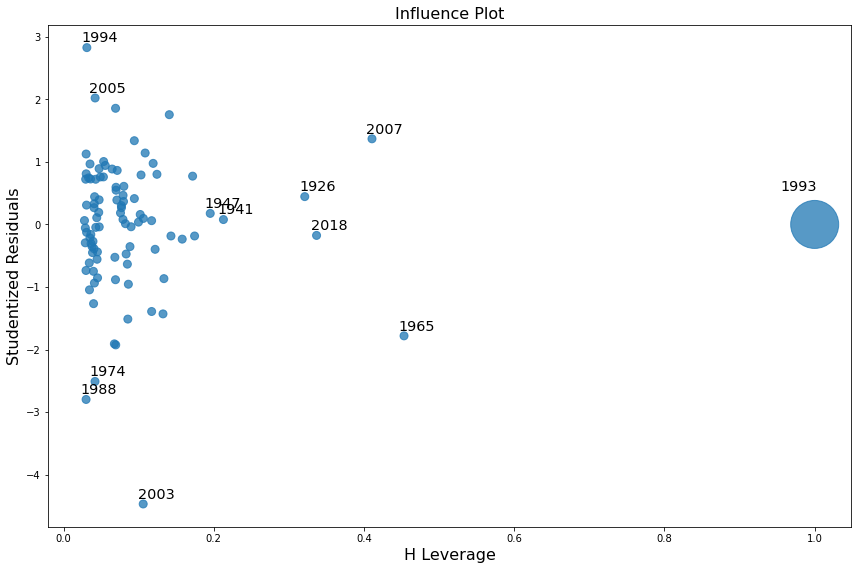

In [41]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

In [42]:
#model = smf.ols(formula = 'Yield ~  Year + I(Year**2) + Zndx1_Aug + Zndx1_Sep + I(Zndx1_Aug**2) + I(Zndx1_Sep**2) + I(Zndx1_Sep*Zndx1_Aug) + floodYear', data=iowa2).fit()
iowa1["diff_Yield"] = iowa1["Yield"].diff()
iowa1["diff_Precip_Jul"] = iowa1["Precip_Jul"].diff()
iowa1["diff_Precip_Aug"] = iowa1["Precip_Aug"].diff()
iowa1["diff_Precip_Aug_Jul"] = iowa1["Precip_Aug"].diff() + iowa1["Precip_Jul"].diff()

In [43]:
p = figure(title="Year Yields", y_axis_type="linear", plot_height = 500,
           tools = TOOLS, plot_width = 1200)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Yields'
p.circle(2003, iowa1.diff_Yield.min(), size = 10, color = 'red')

p.line(iowa1.Year, iowa1.diff_Yield,line_color="blue", line_width = 2)
p.line(iowa1.Year, iowa1.diff_Precip_Aug,line_color="red", line_width = 2)
p.line(iowa1.Year, iowa1.diff_Precip_Jul,line_color="green", line_width = 2)

p.line(iowa1.Year, iowa1.diff_Yield, legend_label="diff_Yield", line_color="blue", line_width = 1)
p.line(iowa1.Year, iowa1.diff_Precip_Aug, legend_label="diff_Precip_Aug",line_color="red", line_width = 1)
p.line(iowa1.Year, iowa1.diff_Precip_Jul, legend_label="diff_Precip_Jul",line_color="green", line_width = 1)

p.legend.location = "top_left"

p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('yield', '@y'),
]
output_file("line_chart.html", title="Line Chart")
show(p)

In [44]:
p = figure(title="Year Yields", y_axis_type="linear", plot_height = 500,
           tools = TOOLS, plot_width = 1200)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Yields'
p.circle(1993, -13, size = 10, color = 'red')

p.line(iowa1.Year, iowa1.diff_Yield,line_color="blue", line_width = 2)
p.line(iowa1.Year, iowa1.diff_Precip_Aug_Jul,line_color="red", line_width = 2)

p.line(iowa1.Year, iowa1.diff_Yield, legend_label="diff_Yield", line_color="blue", line_width = 1)
p.line(iowa1.Year, iowa1.diff_Precip_Aug_Jul, legend_label="diff_Precip_Aug_Jul",line_color="red", line_width = 1)

p.legend.location = "top_left"

p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('yield', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

In [45]:
iowa1["Precip_Aug_Jul"] = iowa1["Precip_Aug"] + iowa1["Precip_Jul"]

iowa2 = iowa1[iowa1["Year"] > 1800]

model = smf.ols(formula = 'Yield ~  Year + I(Year**2) + Precip_Aug + I(Precip_Aug**2) + Precip_Jul + I(Precip_Jul**2)', data=iowa2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     312.9
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           5.11e-58
Time:                        15:37:36   Log-Likelihood:                -237.43
No. Observations:                  97   AIC:                             488.9
Df Residuals:                      90   BIC:                             506.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4299.5817   1663.376      2.585      0.011     994.995    7604.168
Year                  -4.7900      1.687     -2.839      0.006      -8.142      -1.438
I(Year ** 2)           0.0013      0.000      3.107      0.003       0.000       0.002
Precip_Aug             2.1799      0.699      3.120      0.002       0.792       3.568
I(Precip_Aug ** 2)    -0.1716      0.073     -2.343      0.021      -0.317      -0.026
Precip_Jul             2.6721      0.649      4.118      0.000       1.383       3.961
I(Precip_Jul ** 2)    -0.2665      0.065     -4.074      0.000      -0.397      -0.137
==============================================================================
Omnibus:                       24.242   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.672
Skew:                          -0.934   Prob(JB):                     9.92e-12
Kurtosis:                       6.009   Cond. No.                     2.19e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

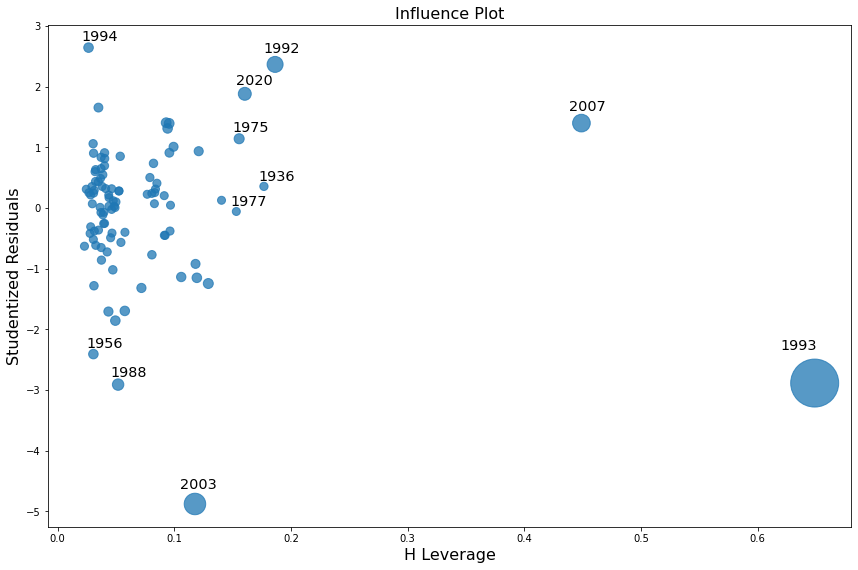

In [46]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

In [47]:
model = smf.ols(formula = 'diff_Yield ~ -1 + diff_Precip_Jul + I(diff_Precip_Jul**2) + diff_Precip_Aug + I(diff_Precip_Aug**2)', data=iowa1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             diff_Yield   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              4.332
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                     0.00296
Time:                        15:37:36   Log-Likelihood:                         -280.55
No. Observations:                  96   AIC:                                      569.1
Df Residuals:                      92   BIC:                                      579.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
diff_Precip_Jul             0.1656      0.239      0.694      0.489      -0.308       0.639
I(diff_Precip_Jul ** 2)     0.2089      0.064      3.279      0.001       0.082       0.335
diff_Precip_Aug             0.5474      0.185      2.963      0.004       0.181       0.914
I(diff_Precip_Aug ** 2)    -0.0543      0.042     -1.290      0.200      -0.138       0.029
==============================================================================
Omnibus:                       11.114   Durbin-Watson:                   2.718
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               31.153
Skew:                           0.068   Prob(JB):                     1.72e-07
Kurtosis:                       5.787   Cond. No.                         6.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

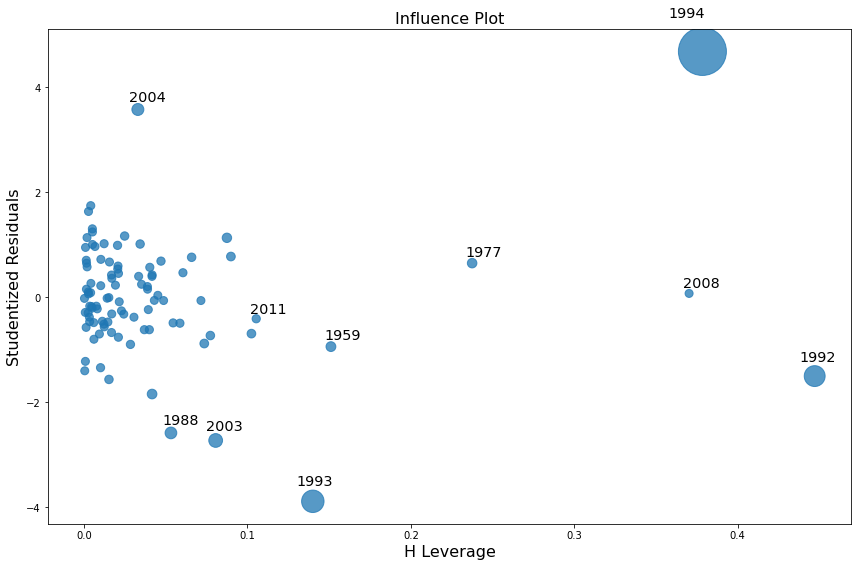

In [48]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

In [49]:
# ARIMA
series = iowa1["Yield"] 
mod = sm.tsa.SARIMAX(series, order=(1, 1, 1), trend='c')
# Estimate the parameters
res = mod.fit()
print(res.summary())
    
arima_pred = res.forecast(20)
arima_pred

# arima_pred.plot()

#series

                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                  126
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -265.911
Date:                Sun, 20 Sep 2020   AIC                            539.823
Time:                        15:37:37   BIC                            551.136
Sample:                             0   HQIC                           544.419
                                - 126                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4419      0.070      6.317      0.000       0.305       0.579
ar.L1          0.0193      0.116      0.166      0.868      -0.209       0.248
ma.L1         -0.9998      8.248     -0.121      0.9

126    54.922858
127    55.305311
128    55.754591
129    56.205163
130    56.655760
131    57.106357
132    57.556954
133    58.007551
134    58.458148
135    58.908745
136    59.359342
137    59.809939
138    60.260536
139    60.711133
140    61.161730
141    61.612327
142    62.062924
143    62.513521
144    62.964118
145    63.414716
dtype: float64

In [50]:
featuresEndog = ['Yield', 'Pmdi1_May', 'Pmdi1_Jun',
       'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct', 'Mintemp_Jul',
       'Mintemp_Aug', 'Mintemp_Sep', 'Mintemp_Oct', 'Precip_May', 'Precip_Jun',
       'Precip_Jul', 'Precip_Aug', 'Precip_Sep', 'Precip_Oct', 'Zndx1_Jun',
       'Zndx1_Jul', 'Zndx1_Aug', 'Zndx1_Sep', 'Zndx1_Oct', 'Pdsi1_May',
       'Pdsi1_Jun', 'Pdsi1_Jul', 'Pdsi1_Aug', 'Pdsi1_Sep', 'Pdsi1_Oct',
       'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep',
       'Maxtemp_Oct']
# featuresEndog = ['Yield', 
#        'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep',
#        'Maxtemp_Oct']
# featuresEndog = ['Yield', 'Pmdi1_May', 'Pmdi1_Jun',
#        'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct']
# featuresEndog = ['Yield', 'Mintemp_Jul',
#        'Mintemp_Aug', 'Mintemp_Sep', 'Mintemp_Oct', 
#        'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep',
#        'Maxtemp_Oct']
featuresEndog = ['Yield', 'Pmdi1_May', 'Pmdi1_Jun',
       'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct', 'Zndx1_Jun',
       'Zndx1_Jul', 'Zndx1_Aug', 'Zndx1_Sep', 'Zndx1_Oct', 'Pdsi1_May',
       'Pdsi1_Jun', 'Pdsi1_Jul', 'Pdsi1_Aug', 'Pdsi1_Sep', 'Pdsi1_Oct']
featuresEndog = ['Yield', 'Pmdi1_May', 'Pmdi1_Jun',
       'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct', 'Zndx1_Jun',
       'Zndx1_Jul', 'Zndx1_Aug', 'Zndx1_Sep', 'Zndx1_Oct']
featuresEndog = ['Yield', 'Pmdi1_May', 'Pmdi1_Jun',
       'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct']


iowa10 = iowa1[featuresEndog]


In [51]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#gather features
l = iowa10.columns.values.tolist()
l.remove("Yield")
features = "+".join(l)
# # get y and X dataframes based on this regression:
y, X = dmatrices('Yield ~' + features, iowa10, return_type='dataframe')

In [52]:
# For each X, calculate VIF and save in dataframe
import pandas as pd
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor   features
0         1.1  Intercept
1         4.6  Pmdi1_May
2         9.9  Pmdi1_Jun
3        13.6  Pmdi1_Jul
4        10.6  Pmdi1_Aug
5        15.2  Pmdi1_Sep
6         8.7  Pmdi1_Oct

In [53]:
print(pd.DataFrame(X.values, columns = X.columns).corr(method='pearson'))

           Intercept  Pmdi1_May  Pmdi1_Jun  Pmdi1_Jul  Pmdi1_Aug  Pmdi1_Sep  \
Intercept        NaN        NaN        NaN        NaN        NaN        NaN   
Pmdi1_May        NaN   1.000000   0.884629   0.815254   0.690822   0.586091   
Pmdi1_Jun        NaN   0.884629   1.000000   0.910296   0.773642   0.645783   
Pmdi1_Jul        NaN   0.815254   0.910296   1.000000   0.896631   0.793329   
Pmdi1_Aug        NaN   0.690822   0.773642   0.896631   1.000000   0.905643   
Pmdi1_Sep        NaN   0.586091   0.645783   0.793329   0.905643   1.000000   
Pmdi1_Oct        NaN   0.551407   0.603907   0.712838   0.833338   0.935759   

           Pmdi1_Oct  
Intercept        NaN  
Pmdi1_May   0.551407  
Pmdi1_Jun   0.603907  
Pmdi1_Jul   0.712838  
Pmdi1_Aug   0.833338  
Pmdi1_Sep   0.935759  
Pmdi1_Oct   1.000000  


In [54]:
#Scikit learn
from sklearn.feature_selection import VarianceThreshold
#from sklearn.svm import LinearSV
from sklearn import linear_model 
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures

In [202]:
allCols = ['Yield', 'Year','Pmdi1_May', 'Pmdi1_Jun',
       'Pmdi1_Jul', 'Pmdi1_Aug', 'Pmdi1_Sep', 'Pmdi1_Oct', 'Mintemp_Jul',
       'Mintemp_Aug', 'Mintemp_Sep', 'Mintemp_Oct', 'Precip_May', 'Precip_Jun',
       'Precip_Jul', 'Precip_Aug', 'Precip_Sep', 'Precip_Oct',
       'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep',
       'Maxtemp_Oct']

# allCols = ['Yield',  'Precip_May', 'Precip_Jun',
#        'Precip_Jul', 'Precip_Aug', 'Precip_Sep', 'Precip_Oct',
#        'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug', 'Maxtemp_Sep',
#        'Maxtemp_Oct']

# allCols = ['Yield',  'Year', 'Precip_Jun', 
#        'Precip_Jul', 'Precip_Aug',
#        'Maxtemp_Jun', 'Maxtemp_Jul', 'Maxtemp_Aug']


# allCols = ['Yield',  'Precip_Aug', 'Precip_Sep', 'Maxtemp_Aug', 'Maxtemp_Sep']

iowaOriginal1 = iowaOriginal[allCols]
iowaOriginal2 = iowaOriginal1.dropna()
features = list(filter(lambda x : x != 'Yield', allCols))
features

['Year',
 'Pmdi1_May',
 'Pmdi1_Jun',
 'Pmdi1_Jul',
 'Pmdi1_Aug',
 'Pmdi1_Sep',
 'Pmdi1_Oct',
 'Mintemp_Jul',
 'Mintemp_Aug',
 'Mintemp_Sep',
 'Mintemp_Oct',
 'Precip_May',
 'Precip_Jun',
 'Precip_Jul',
 'Precip_Aug',
 'Precip_Sep',
 'Precip_Oct',
 'Maxtemp_Jun',
 'Maxtemp_Jul',
 'Maxtemp_Aug',
 'Maxtemp_Sep',
 'Maxtemp_Oct']

In [203]:
iowaOriginal2.head()

Yield  Year  Pmdi1_May  Pmdi1_Jun  Pmdi1_Jul  Pmdi1_Aug  Pmdi1_Sep  \
Year                                                                       
1924   12.0  1924      -1.22       1.54       1.67       2.35       2.39   
1925   14.0  1925      -2.40      -0.53      -1.21      -1.46      -0.53   
1926   15.0  1926      -1.60      -1.28      -1.05      -1.18       2.27   
1927   12.0  1927       2.64       0.60      -1.23      -1.84      -1.29   
1928   17.0  1928      -1.75       0.01       0.92       1.96       2.01   

      Pmdi1_Oct  Mintemp_Jul  Mintemp_Aug  ...  Precip_Jun  Precip_Jul  \
Year                                       ...                           
1924       0.74         57.2         59.7  ...        7.94        3.74   
1925       1.01         60.6         58.9  ...        6.37        2.71   
1926       2.00         62.4         61.1  ...        4.18        3.82   
1927      -0.54         58.9         54.0  ...        2.24        1.92   
1928       2.63         61.7         60.2  ...        5.38        4.33   

      Precip_Aug  Precip_Sep  Precip_Oct  Maxtemp_Jun  Maxtemp_Jul  \
Year                                                                 
1924        5.47        3.00        0.82         76.7         81.6   
1925        3.43        5.04        2.87         81.2         86.3   
1926        3.76        9.56        1.54         78.4         86.0   
1927        2.40        4.76        3.21         77.1         85.6   
1928        6.32        2.94        3.64         75.1         84.9   

      Maxtemp_Aug  Maxtemp_Sep  Maxtemp_Oct  
Year                                         
1924         81.6         69.4         70.2  
1925         84.2         79.5         48.3  
1926         84.0         71.4         60.6  
1927         79.8         77.9         67.3  
1928         83.7         72.4         64.6  

[5 rows x 23 columns]

In [204]:
iowaOriginal2.shape
X = iowaOriginal2[features].values
y = iowaOriginal2["Yield"].values

In [205]:
poly = PolynomialFeatures(2)
polyX = poly.fit_transform(X)
polyX.shape

(96, 276)

In [206]:
features = pd.DataFrame(polyX, columns=poly.get_feature_names(features))
#print(features)

In [232]:
clf = linear_model.Lasso(alpha=1000, normalize=False, max_iter=100000, tol=1e-100).fit(polyX, y)
print(clf.coef_)
print(clf.score(polyX,y))


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.07760911e-04
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.09214447e-05
  1.94122885e-05  0.00000000e+00  3.65831529e-05  3.89911586e-05
  1.98123259e-04  9.36397920e-06 -9.70148613e-05 -0.00000000e+00
 -0.00000000e+00  9.23280365e-05  0.00000000e+00  0.00000000e+00
  2.18881325e-05 -0.00000000e+00 -2.12773304e-04  1.43032164e-05
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

In [233]:
dict1 = dict(zip(features, clf.coef_))
dict2 = dict((k, v) for k, v in dict1.items() if np.abs(v) >= 0.0000000001)
dict2

{'Year^2': 0.0001077609111577016,
 'Year Pmdi1_Aug': 4.092144467859268e-05,
 'Year Pmdi1_Sep': 1.941228854068283e-05,
 'Year Mintemp_Jul': 3.658315285706739e-05,
 'Year Mintemp_Aug': 3.899115858502122e-05,
 'Year Mintemp_Sep': 0.0001981232591015624,
 'Year Mintemp_Oct': 9.36397919733119e-06,
 'Year Precip_May': -9.701486129212516e-05,
 'Year Precip_Aug': 9.232803654639956e-05,
 'Year Maxtemp_Jun': 2.188813251318007e-05,
 'Year Maxtemp_Aug': -0.0002127733040854174,
 'Year Maxtemp_Sep': 1.43032163546115e-05}